In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

In [7]:
# 手绘图表参考：https://zhuanlan.zhihu.com/p/404272545
plt.xkcd()
plt.rcParams.update({"font.family": "FZKaTong-M19S"})

In [3]:
# 读取数据
df = pd.read_csv("iris-data.csv")
df

sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
0                5.1             3.5              1.4             0.2   
1                4.9             3.0              1.4             0.2   
2                4.7             3.2              1.3             0.2   
3                4.6             3.1              1.5             0.2   
4                5.0             3.6              1.4             0.2   
..               ...             ...              ...             ...   
145              6.7             3.0              5.2             2.3   
146              6.3             2.5              5.0             2.3   
147              6.5             3.0              5.2             2.0   
148              6.2             3.4              5.4             2.3   
149              5.9             3.0              5.1             1.8   

              class  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  

[150 rows x 5 columns]

array([<Axes: xlabel='数据序号', ylabel='数值'>,
       <Axes: xlabel='数据序号', ylabel='数值'>,
       <Axes: xlabel='数据序号', ylabel='数值'>,
       <Axes: xlabel='数据序号', ylabel='数值'>], dtype=object)

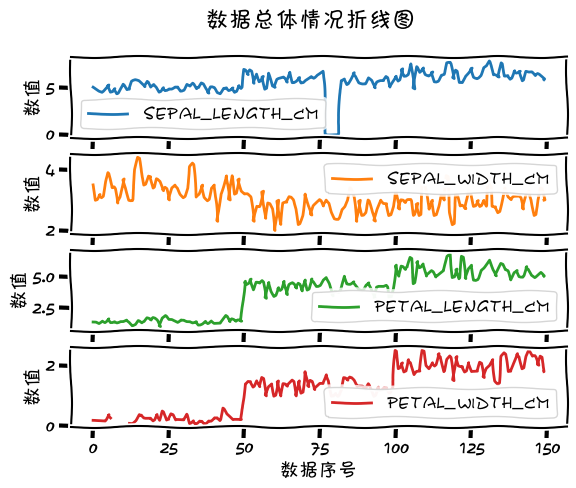

In [14]:
# 先来简单画一个
df.plot(subplots=True, title="数据总体情况折线图", xlabel="数据序号", ylabel="数值")

<Axes: title={'center': '花瓣大小特征'}, xlabel='花瓣宽度', ylabel='花瓣长度'>

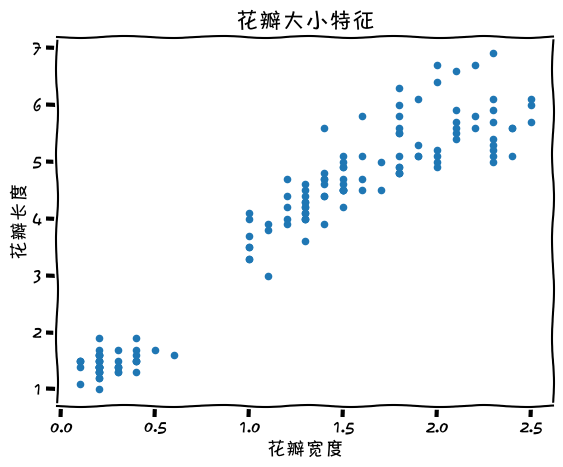

In [15]:
# 花瓣大小特征散点图
df.plot(
    kind="scatter",
    y="petal_length_cm",
    x="petal_width_cm",
    title="花瓣大小特征",
    ylabel="花瓣长度",
    xlabel="花瓣宽度",
)

[]

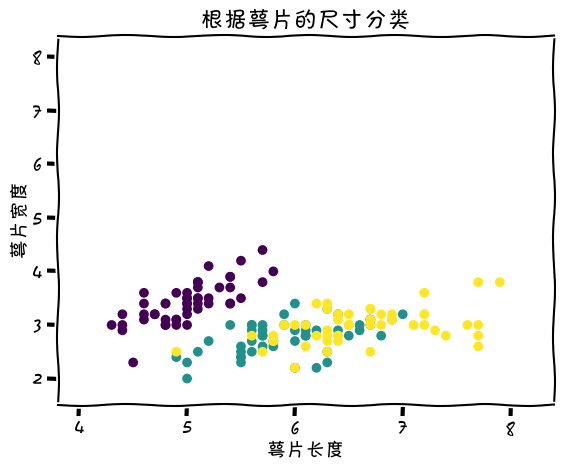

In [12]:
# 用三种颜色表示三种花卉的种类，绘制一幅散点图，x轴表示萼片的长度，y轴表示萼片的宽度
iris = datasets.load_iris()
x = iris.data[:, 0]  # X- Axis -sepal length
y = iris.data[:, 1]  # Y- Axis - sepal length
species = iris.target  # Species

x_min, x_max = x.min() - 0.5, x.max() + 0.5
y_min, y_max = y.min() - 0.5, x.max() + 0.5

# Scatterplot
plt.figure()
plt.title("根据萼片的尺寸分类")
plt.scatter(x, y, c=species)
plt.xlabel("萼片长度")
plt.ylabel("萼片宽度")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.plot()

(-0.4, 3.0)

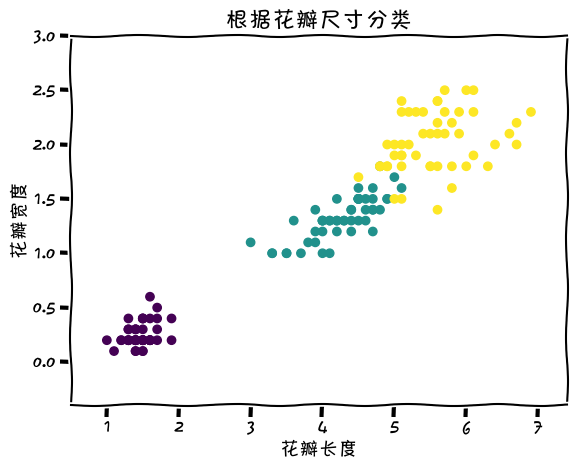

In [14]:
x = iris.data[:, 2]  # X- Axis - petal length
y = iris.data[:, 3]  # Y- Axis - petal width
species = iris.target  # species
x_min, x_max = x.min() - 0.5, x.max() + 0.5
y_min, y_max = y.min() - 0.5, y.max() + 0.5

# Scatterplot
plt.figure()
plt.title("根据花瓣尺寸分类")
plt.scatter(x, y, c=species)
plt.xlabel("花瓣长度")
plt.ylabel("花瓣宽度")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

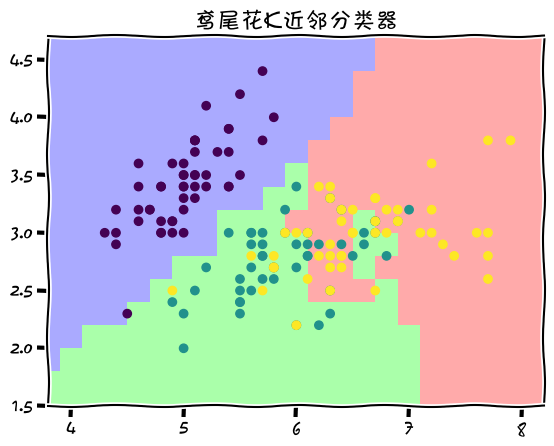

In [22]:
# K近邻分类器
# 萼片测量数据绘制2D散点图中，画出决策边界
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

iris = datasets.load_iris()
x = iris.data[:, :2]  # x-axis- sepal length
y = iris.target  # Y-axis -species

x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5

# MESH
cmap_light = ListedColormap(["#AAAAFF", "#AAFFAA", "#FFAAAA"])
h = 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
knn = KNeighborsClassifier()
knn.fit(x, y)
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# plot the training points
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('鸢尾花K近邻分类器')
plt.show()